In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from utils import *

DATA_PATH = '../../data/esp/'

%load_ext autoreload
%autoreload 2

In [2]:
df = load_data(DATA_PATH,'train',nclasses=3).loc[:,['review_content','review_rate']]
df.head(5)

Dataset cargado para 3 clases (malo=0, medio=1, bueno=2)
Num samples per category:
0    184750
1     92375
2    184750
Name: review_rate, dtype: int64


,review_content,review_rate
0,"Medio berreta, no justifica el gasto, ya se sa...",0
1,Quizás a unas personas les sirve y a otras no ...,1
2,Excelente !! superó mi expectativas. Lo único ...,2
3,Es una buena relación calidad/precio. La cámar...,2
4,"Muy poca voluntad para ayudarme con cambiarlo,...",0


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def word_vectorize_category(ds,y,token_pattern,ngram_range,max_df,min_df,max_features,vocab):
    vec = CountVectorizer(input='content',encoding='utf-8',decode_error='strict',strip_accents=None,
              lowercase=True,preprocessor=None,tokenizer=None,stop_words=None,token_pattern=token_pattern,
              ngram_range=(1,1),analyzer='word',max_df=max_df,min_df=min_df,max_features=max_features,
              vocabulary=vocab,binary=False,dtype=float)
    X = vec.fit_transform(ds)
    cats = np.unique(y)
    X_cats = np.zeros((len(cats),X.shape[1]))
    for c in cats:
        X_cats[c,:] = np.asarray(X[y == c,:].sum(axis=0)).squeeze()
        
    return X_cats, vec.vocabulary_


X, vocab = word_vectorize_category(df['review_content'],df['review_rate'],
                token_pattern=r'(\w+|[\.,;:"\'!¡\?¿])',ngram_range=(1,1),max_df=1.,min_df=1,
                max_features=10000,vocab=None)

<IPython.core.display.Javascript object>


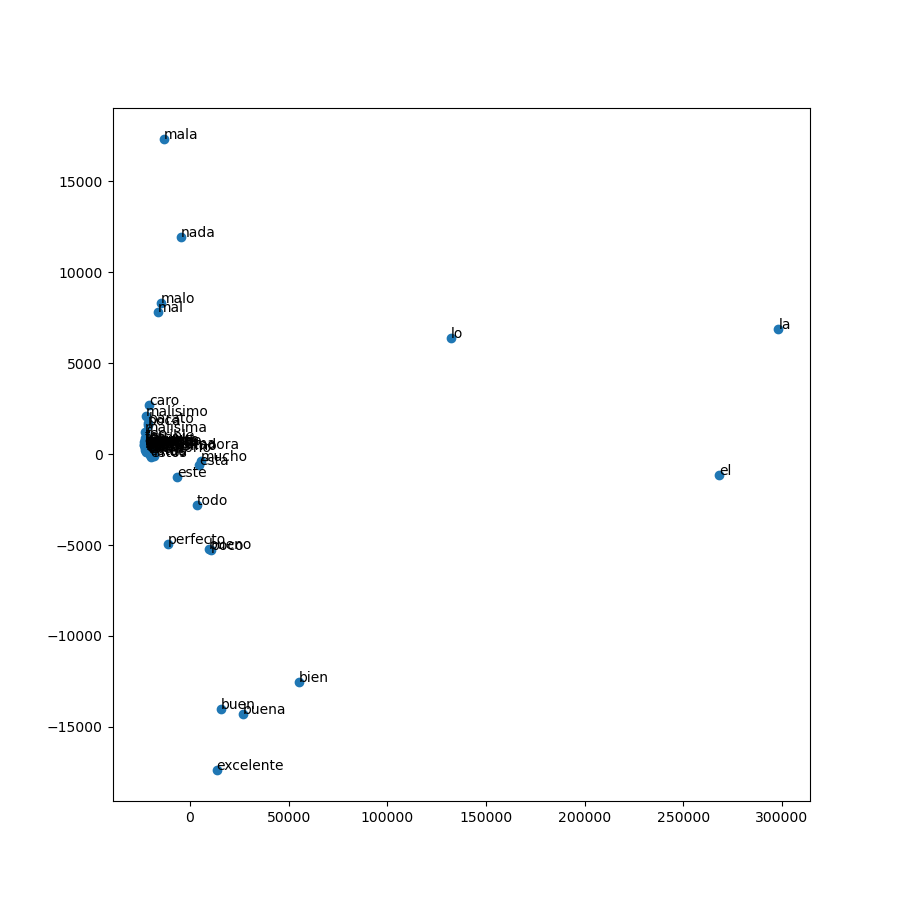

In [13]:
words = 'bueno malo buena mala buen bien mal malísimo buenísimo malisima buenísima perfecto excelente terrible'.split(' ') + \
        'mucho poco mucha poca lindo linda feo fea nada todo barato caro'.split(' ') + \
        'azul verde rojo amarillo celeste blanco negro'.split(' ') + \
        'silla mueble escritorio mesa computadora celular'.split(' ') + \
        'el él ella la lo ese esa esta esto este estos estas mujer hombre género'.split(' ')

fig, ax = vsm.pca_viz(X.T,vocab,words)

In [14]:
X_tfidf = vsm.tfidf(X)
fig, ax = vsm.pca_viz(X_tfidf.T,vocab,words)

AttributeError: 'numpy.ndarray' object has no attribute 'indptr'